In [ ]:
!pip install mediapipe

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 33.0 MB 1.2 MB/s 
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 1.12
    Uninstalling flatbuffers-1.12:
      Successfully uninstalled flatbuffers-1.12
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.9.2 requires flatbuffers<2,>=1.12, but you have flatbuffers 22.11.23 which is incompatible.


In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import mediapipe as mp
 
img_hand = '/content/drive/Shareddrives/2022-2 AI융합캡스톤디자인2/시연/hand.jpg'
img_tatto = '/content/drive/Shareddrives/2022-2 AI융합캡스톤디자인2/시연/tatto_style.jpg'

In [ ]:
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_hands = mp.solutions.hands

In [ ]:
IMAGE_FILES = [img_hand]

with mp_hands.Hands(
    static_image_mode=True,
    max_num_hands=2,
    min_detection_confidence=0.5) as hands:

  for idx, file in enumerate(IMAGE_FILES):
    # Read an image, flip it around y-axis for correct handedness output (see
    # above).
    image = cv2.flip(cv2.imread(file), 1)
    # Convert the BGR image to RGB before processing.
    results = hands.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

    # Print handedness and draw hand landmarks on the image.
    # print('Handedness:', results.multi_handedness)

    if not results.multi_hand_landmarks:
      continue
    image_height, image_width, _ = image.shape
    annotated_image = image.copy()
    for hand_landmarks in results.multi_hand_landmarks:
      #print('hand_landmarks:', hand_landmarks)
      
      idx0x = hand_landmarks.landmark[0].x
      idx9x = hand_landmarks.landmark[9].x
      print(idx9x * 302)
      idx0y = hand_landmarks.landmark[0].y
      idx9y = hand_landmarks.landmark[9].y

      idxX = 1-(idx0x + idx9x) / 2
      idxY = (idx0y + idx9y) / 2

149.13175344467163


resize_img.shape = (403, 302, 3)


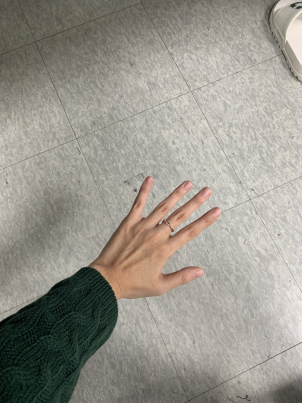

In [ ]:
img1 = cv2.resize(cv2.flip(annotated_image, 1), (0, 0), fx=0.1, fy=0.1, interpolation=cv2.INTER_AREA)
print("resize_img.shape = {0}".format(img1.shape)) 
cv2_imshow(img1) 

resize_img.shape = (40, 40, 3)


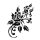

In [ ]:
img2 = cv2.imread(img_tatto)

img2 = cv2.resize(img2, (0, 0), fx=0.1, fy=0.1, interpolation=cv2.INTER_AREA)
print("resize_img.shape = {0}".format(img2.shape)) 
cv2_imshow(img2) 

55.09731637905383
(40, 40, 3)


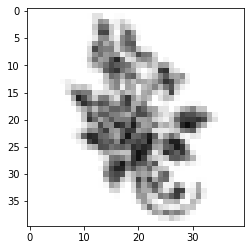

In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt


tan_theta = (hand_landmarks.landmark[0].x - hand_landmarks.landmark[9].x) / (hand_landmarks.landmark[0].y - hand_landmarks.landmark[9].y)
theta = np.arctan(tan_theta)

rotate_angle = theta * 180/math.pi
print(rotate_angle)

def rotate_image(image, angle):
  image_center = tuple(np.array(image.shape[1::-1]) / 2)
  rot_mat = cv2.getRotationMatrix2D(image_center, angle, 1.0)
  result = cv2.warpAffine(image, rot_mat, image.shape[1::-1], flags=cv2.INTER_LINEAR,borderValue=(255,255,255))
  return result

img_rotate = rotate_image(img2,rotate_angle)
print(img_rotate.shape)
plt.imshow(img_rotate)
plt.show()

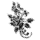

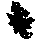

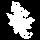

In [ ]:
# 워터마크로 넣을 이미지를 그레이스케일 색상공간으로 변환
img2gray = cv2.cvtColor(img_rotate, cv2.COLOR_BGR2GRAY)
# 그레이스케일 이미지를 임계값으로 이진화하여 마스크 생성
ret, mask = cv2.threshold(img2gray, 250, 255, cv2.THRESH_BINARY)
# 해당 마스크의 역처리(not 비트연산)
mask_inv = cv2.bitwise_not(mask)

# 마스크, 역마스크 이미지 출력
cv2_imshow(img2gray)
cv2_imshow(mask)
cv2_imshow(mask_inv)

190.66332006454468
149.13175344467163
(403, 302, 3)


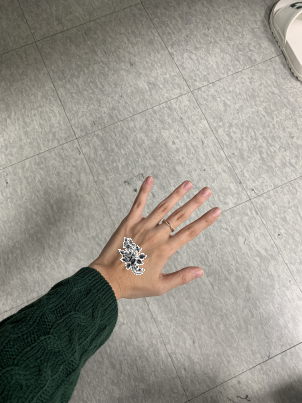

In [ ]:
# img1: hand
# img2: tatto

print(img1.shape[1]*idx0x)
print(img1.shape[1]*idx9x)

w = int(img1.shape[1]*idxX) 
h = int(img1.shape[0]*idxY) 
print(img1.shape)
height, width, channels = img2.shape 

roi = img1[h-int(height//2):h+int(height//2), w-int(width//2):w+int(width//2)]

cv2.copyTo(img_rotate, mask_inv, roi)
cv2_imshow(img1)